In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

In [7]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)

In [8]:
X.shape

(1000, 2)

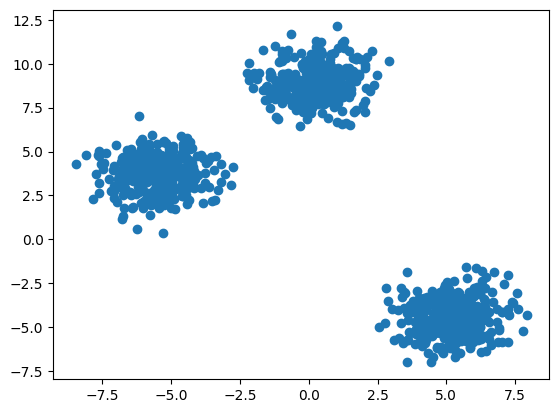

In [9]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.cluster import KMeans

1. Manual Process using Elbow method

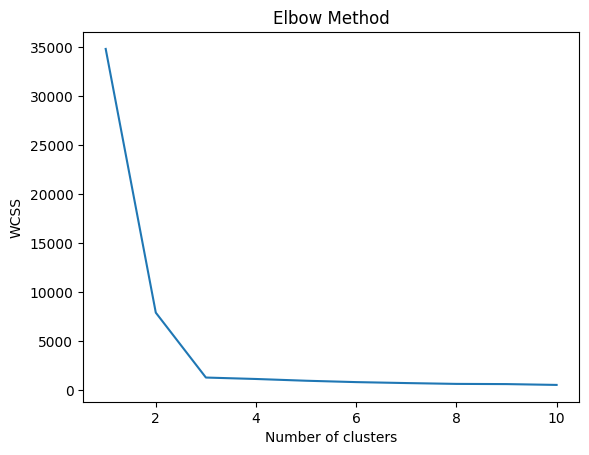

In [12]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
k_means = KMeans(n_clusters=3, init='k-means++')

In [14]:
y_train_labels = k_means.fit_predict(X_train)
y_test_labels = k_means.predict(X_test)

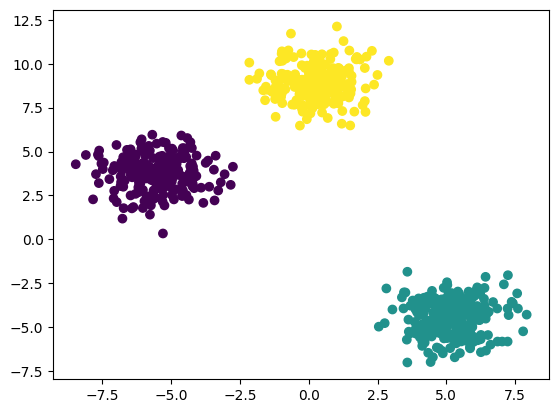

In [15]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train_labels)

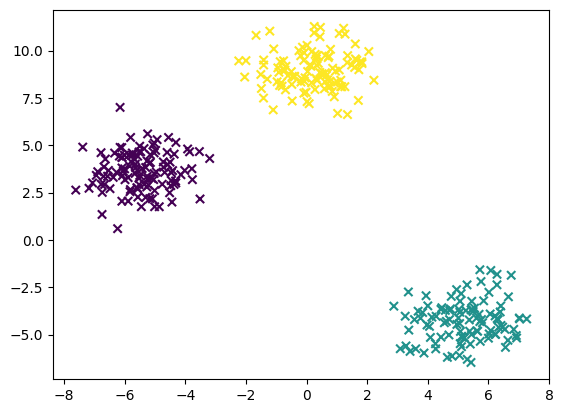

In [16]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_labels, marker='x')

2. Using liberary knee locater

In [17]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [18]:
from kneed import KneeLocator

kl = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
print(kl.elbow)

3


In [19]:
# Performance Metrics
from sklearn.metrics import silhouette_score

In [20]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    y_labels = kmeans.predict(X_train)
    silhouette_scores.append(silhouette_score(X_train, y_labels))

In [21]:
silhouette_scores

[0.7281443868598331,
 0.8071181203797672,
 0.6519643024137518,
 0.5054411544422025,
 0.4765005992846624,
 0.3466634066539347,
 0.32876833196624783,
 0.3454353074198493,
 0.34137288685739037]

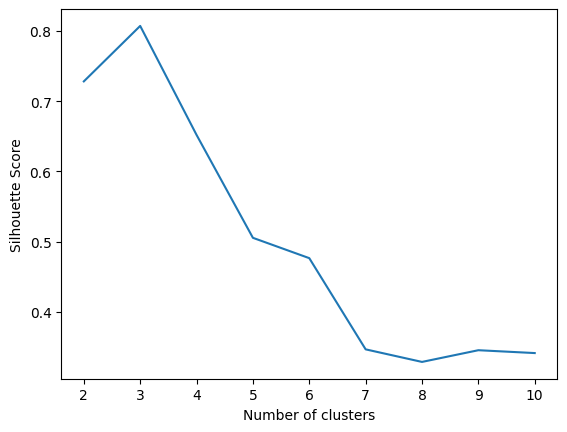

In [22]:
## Plotting the Silhouette Scores
plt.plot(range(2,11), silhouette_scores)    
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')  
plt.show()